# IBM Machine Learning - Unsupervised Machine Learning Clustering Report

In [ ]:
https://www.kaggle.com/karthickaravindan/k-means-clustering-project/data

# Import Library

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('College_Data.csv')

In [83]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Data Preprocessing

In [84]:
df_processing = df.copy()

In [85]:
# info of data
df_processing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [86]:
# =====Data types======
df_processing.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [87]:
df_processing.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [88]:
# ==== Renamimg for beter understanding =====
df_processing.rename(columns={'Unnamed: 0':'College', 'Top10perc': 'Top 10%', 'Top25perc':'Top 25%', 'F.Undergrad':'Full-time-Undergrad', 
                              'P.Undergrad':'Part-time-Undergrad', 'Room.Board':'Boarding','perc.alumni':'Alumni %', 'Grad.Rate':'Graduate-Rate'}, inplace = True)

In [89]:
df_processing.head()

,College,Private,Apps,Accept,Enroll,Top 10%,Top 25%,Full-time-Undergrad,Part-time-Undergrad,Outstate,Boarding,Books,Personal,PhD,Terminal,S.F.Ratio,Alumni %,Expend,Graduate-Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# EDA

In [90]:
df_eda = df_processing.copy()

In [91]:
# number of rows and columns
num_rows, num_cols = df_eda.shape
print(f'There are {num_rows} rows and {num_cols} columns.')

There are 777 rows and 19 columns.


In [92]:
# view columns in data set
df_eda.columns

Index(['College', 'Private', 'Apps', 'Accept', 'Enroll', 'Top 10%', 'Top 25%',
       'Full-time-Undergrad', 'Part-time-Undergrad', 'Outstate', 'Boarding',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'Alumni %',
       'Expend', 'Graduate-Rate'],
      dtype='object')

In [93]:
# Descriptive Analysis
df_eda.describe()

,Apps,Accept,Enroll,Top 10%,Top 25%,Full-time-Undergrad,Part-time-Undergrad,Outstate,Boarding,Books,Personal,PhD,Terminal,S.F.Ratio,Alumni %,Expend,Graduate-Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [94]:
# Descriptive Analysis (object)
df_eda.describe(include='object')

,College,Private
count,777,777
unique,777,2
top,South Dakota State University,Yes
freq,1,565


In [95]:
values = df_eda.Private.value_counts()
values.values

array([565, 212], dtype=int64)

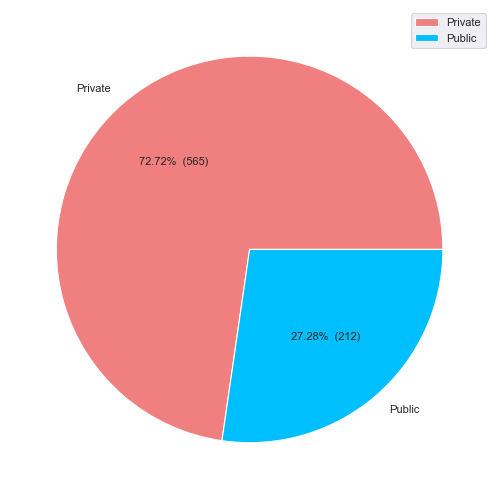

In [96]:
# Total number of Private and Public College
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

values = df_eda.Private.value_counts()

colors = ['#F08080','#00BFFF']

plt.pie(x=df_eda.Private.value_counts()
       ,labels = ['Private', 'Public']
       ,autopct=make_autopct(values.values)
       ,colors=colors)


plt.legend()
plt.show() 

In [97]:
df_eda['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

Text(0.5, 1.0, 'With Private')

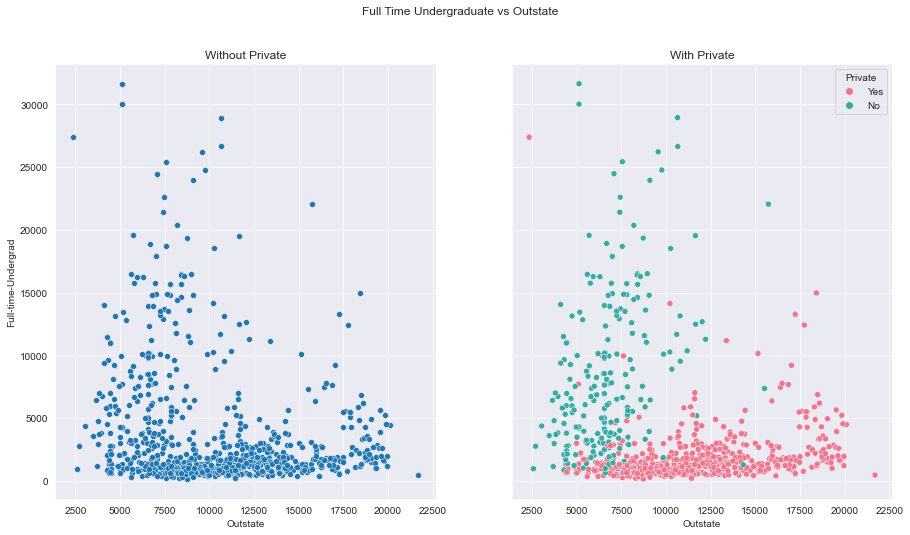

In [98]:
# =========== EDA numerical data ===========
fig, axes = plt.subplots(1,2, figsize=(15, 8), sharey=True)
fig.suptitle('Full Time Undergraduate vs Outstate')


sns.scatterplot(ax=axes[0], x='Outstate',y='Full-time-Undergrad',data=df_eda, palette = "husl")
axes[0].set_title('Without Private')

sns.scatterplot(ax=axes[1],x='Outstate',y='Full-time-Undergrad',data=df_eda,hue='Private', palette = "husl")
axes[1].set_title('With Private')

D:\anacondasetup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anacondasetup\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


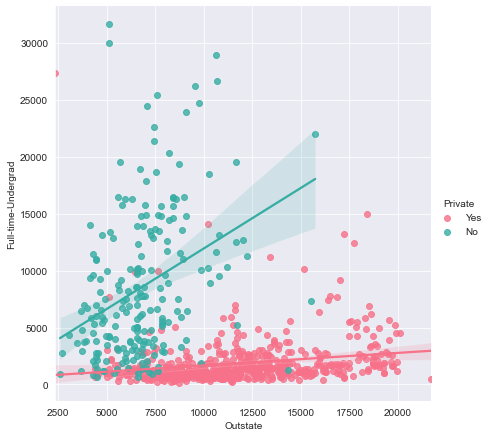

In [99]:
sns.lmplot('Outstate','Full-time-Undergrad',data=df_eda, hue='Private',
           size=6,palette = "husl")

In [100]:
df_eda['Graduate-Rate']

0      60
1      56
2      54
3      59
4      15
       ..
772    40
773    83
774    49
775    99
776    99
Name: Graduate-Rate, Length: 777, dtype: int64

In [101]:
Histogram showing Out of State Tuition based on the Private colum

SyntaxError: invalid syntax (<ipython-input-101-7e8dc9c82dbb>, line 1)

In [ ]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df_eda,hue="Private",palette='husl',size=6,aspect=2)
hist = g.map(plt.hist, 'Outstate',bins=20,alpha=0.7)

In [ ]:
# =========== EDA numerical data ===========
fig, axes = plt.subplots(1,2, figsize=(15, 8), sharey=True)
fig.suptitle('Part Time Undergraduate vs Outstate')


sns.scatterplot(ax=axes[0], x='Outstate',y='Part-time-Undergrad',data=df_eda, palette = "husl")
axes[0].set_title('Without Private')

sns.scatterplot(ax=axes[1],x='Outstate',y='Part-time-Undergrad',data=df_eda,hue='Private', palette = "husl")
axes[1].set_title('With Private')

In [ ]:
sns.lmplot('Outstate','Part-time-Undergrad',data=df_eda, hue='Private',
           size=6,palette = "husl")

In [ ]:
# =========== EDA numerical data ===========
fig, axes = plt.subplots(1,2, figsize=(15, 8), sharey=True)
fig.suptitle('Boarding vs Outstate')


sns.scatterplot(ax=axes[0], x='Boarding',y='Graduate-Rate',data=df_eda,palette = "husl")
axes[0].set_title('Without Private')

sns.scatterplot(ax=axes[1], x='Boarding',y='Graduate-Rate',data=df_eda, hue='Private', palette = "husl")
axes[1].set_title('With Private')

In [ ]:
Histogram for Outstate column

In [ ]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df_eda,hue="Private",palette='husl',size=6,aspect=2)
hist = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

In [102]:
#Histogram for Graduate Rate column

D:\anacondasetup\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


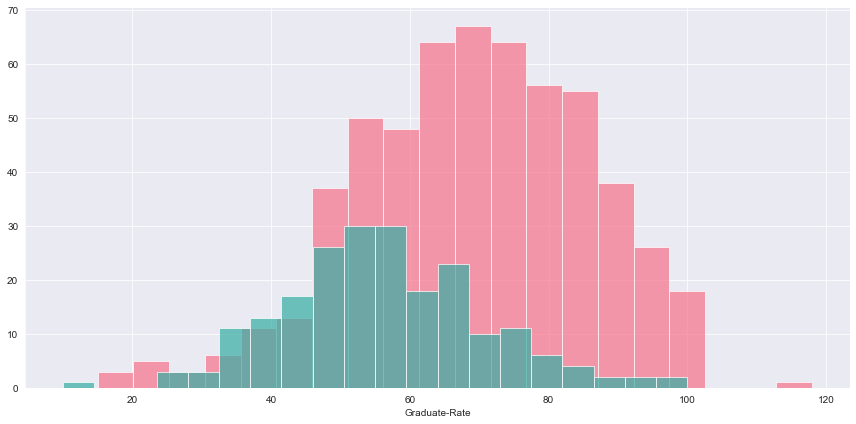

In [103]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df_eda,hue="Private",palette='husl',size=6,aspect=2)
g = g.map(plt.hist,'Graduate-Rate',bins=20,alpha=0.7)

# Feature Engineering

In [104]:
df_feat = df_eda.copy() 

In [105]:
# Removing columns with all unique values (ID)
df_feat.drop(df_feat.columns[df_feat.nunique() == df_feat.shape[0]],axis=1,inplace=True)
df_feat.head()

,Private,Apps,Accept,Enroll,Top 10%,Top 25%,Full-time-Undergrad,Part-time-Undergrad,Outstate,Boarding,Books,Personal,PhD,Terminal,S.F.Ratio,Alumni %,Expend,Graduate-Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [106]:
# Feature Encoding for Taerget Data
#df_feat.Private = df_feat.Private.apply(lambda x : 1 if x == 'Yes' else 0)
#df_feat.head()

In [107]:
df_feat.Private.value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [108]:
# skewness messure  
skew_columns = df_feat.skew().sort_values(ascending=False)
skew_columns

Part-time-Undergrad    5.692353
Apps                   3.723750
Books                  3.485025
Expend                 3.459322
Accept                 3.417727
Enroll                 2.690465
Full-time-Undergrad    2.610458
Personal               1.742497
Top 10%                1.413217
S.F.Ratio              0.667435
Alumni %               0.606891
Outstate               0.509278
Boarding               0.477356
Top 25%                0.259340
Graduate-Rate         -0.113777
PhD                   -0.768170
Terminal              -0.816542
dtype: float64

In [109]:
# skewness messure > 0.75
skew_columns = df_feat.skew().sort_values(ascending=False)
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Part-time-Undergrad    5.692353
Apps                   3.723750
Books                  3.485025
Expend                 3.459322
Accept                 3.417727
Enroll                 2.690465
Full-time-Undergrad    2.610458
Personal               1.742497
Top 10%                1.413217
dtype: float64

In [110]:
# Apply log transformation to data with skewness > 0.75
for col in skew_columns.index:
    df_feat[col] = np.log1p(df_feat[col])

In [111]:
df_feat.skew().sort_values(ascending=False) 

Expend                 0.845072
S.F.Ratio              0.667435
Alumni %               0.606891
Full-time-Undergrad    0.517054
Outstate               0.509278
Boarding               0.477356
Enroll                 0.373329
Top 25%                0.259340
Apps                   0.188485
Accept                 0.179966
Personal              -0.105722
Graduate-Rate         -0.113777
Part-time-Undergrad   -0.362271
Books                 -0.366866
Top 10%               -0.433738
PhD                   -0.768170
Terminal              -0.816542
dtype: float64

In [112]:
feature_columns = df_feat.columns [df_feat.columns != 'Private']
feature_columns

Index(['Apps', 'Accept', 'Enroll', 'Top 10%', 'Top 25%', 'Full-time-Undergrad',
       'Part-time-Undergrad', 'Outstate', 'Boarding', 'Books', 'Personal',
       'PhD', 'Terminal', 'S.F.Ratio', 'Alumni %', 'Expend', 'Graduate-Rate'],
      dtype='object')

In [113]:
df_feat.head()

,Private,Apps,Accept,Enroll,Top 10%,Top 25%,Full-time-Undergrad,Part-time-Undergrad,Outstate,Boarding,Books,Personal,PhD,Terminal,S.F.Ratio,Alumni %,Expend,Graduate-Rate
0,Yes,7.415175,7.117206,6.582025,3.178054,52,7.967627,6.287859,7440,3300,6.111467,7.696667,70,78,18.1,12,8.859647,60
1,Yes,7.690286,7.562681,6.240276,2.833213,29,7.895063,7.113142,12280,6450,6.621406,7.313887,29,30,12.2,16,9.261794,56
2,Yes,7.264730,7.001246,5.820083,3.135494,50,6.944087,4.605170,11250,3750,5.993961,7.061334,53,66,12.9,30,9.075208,54
3,Yes,6.035481,5.857933,4.927254,4.110874,89,6.236370,4.158883,12960,5450,6.111467,6.775366,92,97,7.7,37,9.853089,59
4,Yes,5.267858,4.990433,4.025352,2.833213,44,5.521461,6.768493,7560,4120,6.685861,7.313887,76,72,11.9,2,9.298626,15


In [114]:
#Apply Standard Scaler to Feature data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
for col in feature_columns:
    df_feat[col] = sc.fit_transform(df_feat[[col]])

df_feat.head()

,Private,Apps,Accept,Enroll,Top 10%,Top 25%,Full-time-Undergrad,Part-time-Undergrad,Outstate,Boarding,Books,Personal,PhD,Terminal,S.F.Ratio,Alumni %,Expend,Graduate-Rate
0,Yes,-0.011583,0.006320,0.427055,0.014037,-0.191827,0.323264,0.361674,-0.746356,-0.964905,-0.601556,1.259401,-0.163028,-0.115729,1.013776,-0.867574,-0.541584,-0.318252
1,Yes,0.245031,0.457067,0.067493,-0.535636,-1.353911,0.252545,0.875509,0.457496,1.909208,1.286817,0.469963,-2.675646,-3.378176,-0.477704,-0.544572,0.443405,-0.551262
2,Yes,-0.151913,-0.111012,-0.374601,-0.053802,-0.292878,-0.674259,-0.685997,0.201305,-0.554317,-1.036697,-0.050896,-1.204845,-0.931341,-0.300749,0.585935,-0.013606,-0.667767
3,Yes,-1.298516,-1.267855,-1.313967,1.500947,1.677612,-1.363987,-0.963863,0.626633,0.996791,-0.601556,-0.640670,1.185206,1.175657,-1.615274,1.151188,1.891683,-0.376504
4,Yes,-2.014530,-2.145621,-2.262878,-0.535636,-0.596031,-2.060724,0.660925,-0.716508,-0.216723,1.525504,0.469963,0.204672,-0.523535,-0.553542,-1.675079,0.533620,-2.939613


# MACHINE LEARNING

In [115]:
df_ml = df_feat.copy()

# K-means Cluster

In [116]:
# K-Means Cluster - init='random'
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='random', random_state=42)
km = km.fit(df_ml[feature_columns])

df_ml['kmeans'] = km.predict(df_ml[feature_columns])

In [117]:
df_ml.head()

,Private,Apps,Accept,Enroll,Top 10%,Top 25%,Full-time-Undergrad,Part-time-Undergrad,Outstate,Boarding,Books,Personal,PhD,Terminal,S.F.Ratio,Alumni %,Expend,Graduate-Rate,kmeans
0,Yes,-0.011583,0.006320,0.427055,0.014037,-0.191827,0.323264,0.361674,-0.746356,-0.964905,-0.601556,1.259401,-0.163028,-0.115729,1.013776,-0.867574,-0.541584,-0.318252,0
1,Yes,0.245031,0.457067,0.067493,-0.535636,-1.353911,0.252545,0.875509,0.457496,1.909208,1.286817,0.469963,-2.675646,-3.378176,-0.477704,-0.544572,0.443405,-0.551262,0
2,Yes,-0.151913,-0.111012,-0.374601,-0.053802,-0.292878,-0.674259,-0.685997,0.201305,-0.554317,-1.036697,-0.050896,-1.204845,-0.931341,-0.300749,0.585935,-0.013606,-0.667767,0
3,Yes,-1.298516,-1.267855,-1.313967,1.500947,1.677612,-1.363987,-0.963863,0.626633,0.996791,-0.601556,-0.640670,1.185206,1.175657,-1.615274,1.151188,1.891683,-0.376504,1
4,Yes,-2.014530,-2.145621,-2.262878,-0.535636,-0.596031,-2.060724,0.660925,-0.716508,-0.216723,1.525504,0.469963,0.204672,-0.523535,-0.553542,-1.675079,0.533620,-2.939613,0


In [118]:
(df_ml[['Private','kmeans']]
 .groupby(['kmeans','Private'])
 .size()
 .to_frame()
 .rename(columns={0:'Total'}))

Total
kmeans Private       
0      No         102
       Yes        321
1      No         110
       Yes        244

In [119]:
# K-Means Cluster - init='k-means++'
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='k-means++', random_state=42)
km = km.fit(df_ml[feature_columns])

df_ml['kmeans'] = km.predict(df_ml[feature_columns])
(df_ml[['Private','kmeans']]
 .groupby(['kmeans','Private'])
 .size()
 .to_frame()
 .rename(columns={0:'Total'}))

Total
kmeans Private       
0      No         112
       Yes        243
1      No         100
       Yes        322

# Agglomerative Clustering

In [124]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
for linkage in ['complete', 'ward']:
    aggc = AgglomerativeClustering(n_clusters=2, linkage=linkage, compute_full_tree=True)
    aggc = aggc.fit(df_ml[feature_columns])
    df_ml[str('aggc_'+linkage)] = aggc.fit_predict(df_ml[feature_columns])

In [126]:
(df_ml[['Private','aggc_complete']]
 .groupby(['aggc_complete','Private'])
 .size()
 .to_frame()
 .rename(columns={0:'Total'}))


Total
aggc_complete Private       
0             No         166
              Yes        304
1             No          46
              Yes        261

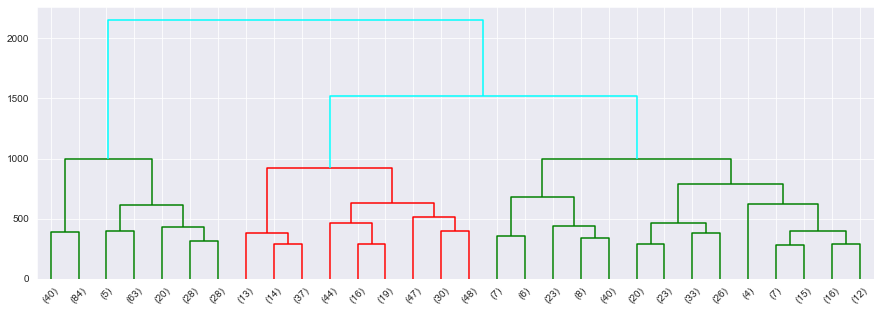

In [127]:
Z = hierarchy.linkage(aggc.children_, method='complete')

fig, ax = plt.subplots(figsize=(15,5))


hierarchy.set_link_color_palette(['green', 'red'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='cyan')

In [128]:
(df_ml[['Private','aggc_ward']]
 .groupby(['aggc_ward','Private'])
 .size()
 .to_frame()
 .rename(columns={0:'Total'}))

Total
aggc_ward Private       
0         No         202
          Yes        252
1         No          10
          Yes        313

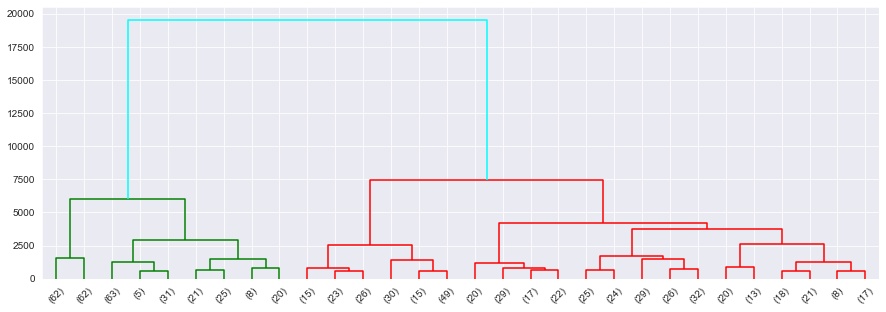

In [122]:
Z = hierarchy.linkage(aggc.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


hierarchy.set_link_color_palette(['green', 'red'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='cyan')

In [123]:
# Comparing AgglomerativeClustering with KMeans
(df_ml[['Private','aggc_complete', 'aggc_ward','kmeans']]
 .groupby(['Private', 'aggc_complete', 'aggc_ward', 'kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'Total'}))

Total
Private aggc_complete aggc_ward kmeans       
No      0             0         0         104
                                1          54
                      1         0           8
        1             0         1          44
                      1         1           2
Yes     0             0         0          14
                                1          22
                      1         0         222
                                1          46
        1             0         0           2
                                1         214
                      1         0           5
                                1          40